In [1]:
from igraph import Graph

from IPython import display
from igraph import plot

In [35]:
g = Graph()
ledges = []
num_vertices = 0
with open('edges.txt', 'r') as edges:
    for e in edges:
        v1, v2 = e.split(' ')
        num_vertices = max(num_vertices, int(v1), int(v2))
        ledges.append((int(v1), int(v2)))
g.add_vertices(num_vertices + 1)
g.add_edges(ledges)
print(g)

IGRAPH U--- 62 602 --
+ edges:
 0 --  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
49 50 51 52 53 54 55 56 57 58 59 60 61
 1 --  0  2  2 26 26 27 27 38 38 41 41 57 57
 2 --  0  1  1 26 26 27 27 38 38
 3 --  0  4  4  7  7 12 12 13 13 16 16 18 18 19 19 23 23 24 24 30 30 32 32 33
33 34 34 40 40 43 43 44 44 46 46 58 58 59 59
 4 --  0  3  3  7  7 12 12 13 13 16 16 18 18 19 19 23 23 24 24 32 32 33 33 34
34 39 39 42 42 43 43 44 44 46 46
 5 --  0  6  6 29 29 49 49
 6 --  0  5  5  7  7 29 29 49 49
 7 --  0  3  3  4  4  6  6  8  8  9  9 14 14 15 15 16 16 23 23 24 24 28 28 29
29 30 30 31 31 32 32 33 33 34 34 36 36 40 40 42 42 43 43 44 44 46 46 47 47 49
49 50 50 53 53 55 55 59 59
 8 --  0  7  7 23 23 30 30 32 32 39 39 50 50
 9 --  0  7  7 14 14 15 15 28 28 29 29 31 31 36 36 42 42 47 47 48 48 53 53 55
55
10 --  0 11 11 22 22 25 25 37 37 45 45 51 51
11 --  0 10 10 22 22 25 25 45 45 51 51
12 --  0 

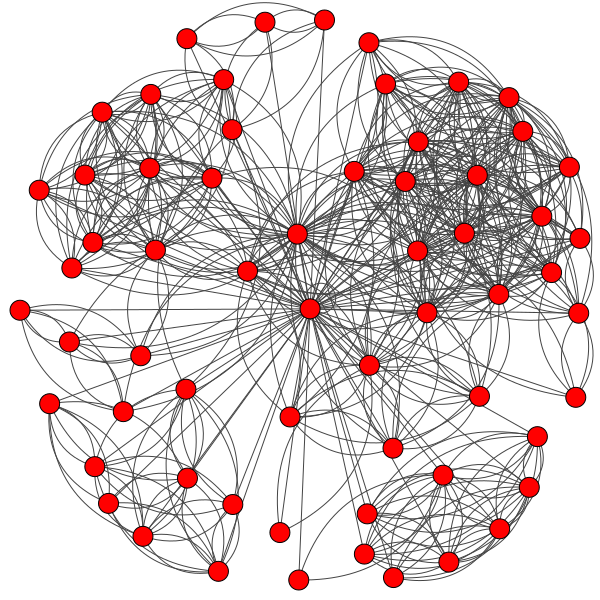

In [48]:
r = plot(g, layout = g.layout_kamada_kawai(),target="./erdos.png")
display.Image(filename="./erdos.png")

In [49]:
g.diameter()

2

In [50]:
g.transitivity_undirected()

0.5227690047741461

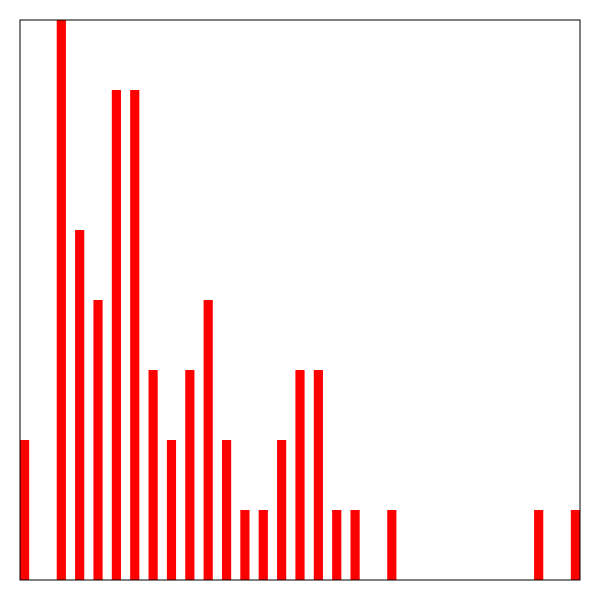

In [52]:
h = g.degree_distribution()
plot(h)

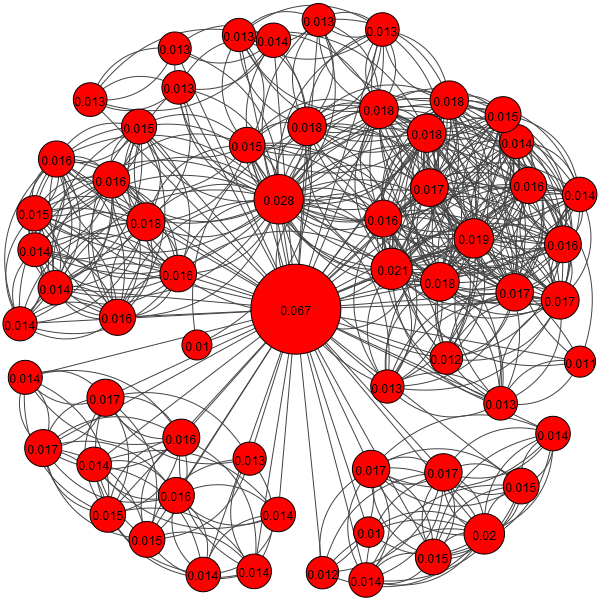

In [102]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(30, 90))

pr = g.pagerank()
pr = np.array(pr).reshape(-1, 1)
sc_pr = sc.fit_transform(pr)

g.vs['label_size'] = 12
for i in range(g.vcount()):
    g.vs[i]['size'] = sc_pr[i]
    g.vs[i]['label'] = pr[i][0].round(3)

r = plot(g, layout = g.layout_kamada_kawai(),target="./erdos.png")
display.Image(filename="./erdos.png")